In [2]:
import pandas as pd

Lam sach du lieu

In [3]:
df = pd.read_csv('top_songs.csv', encoding='cp1252')
df.drop_duplicates()
df

Unnamed: 0                                              title  \
0             1                                   Hey, Soul Sister   
1             2                               Love The Way You Lie   
2             3                                            TiK ToK   
3             4                                        Bad Romance   
4             5                               Just the Way You Are   
..          ...                                                ...   
598         599                Find U Again (feat. Camila Cabello)   
599         600      Cross Me (feat. Chance the Rapper & PnB Rock)   
600         601  No Brainer (feat. Justin Bieber, Chance the Ra...   
601         602    Nothing Breaks Like a Heart (feat. Miley Cyrus)   
602         603                                   Kills You Slowly   

               artist        top genre  year  bpm  nrgy  dnce  dB  live  val  \
0               Train       neo mellow  2010   97    89    67  -4     8   80   
1              Eminem  detroit hip hop  2010   87    93    75  -5    52   64   
2               Kesha        dance pop  2010  120    84    76  -3    29   71   
3           Lady Gaga        dance pop  2010  119    92    70  -4     8   71   
4          Bruno Mars              pop  2010  109    84    64  -5     9   43   
..                ...              ...   ...  ...   ...   ...  ..   ...  ...   
598       Mark Ronson        dance pop  2019  104    66    61  -7    20   16   
599        Ed Sheeran              pop  2019   95    79    75  -6     7   61   
600         DJ Khaled        dance pop  2019  136    76    53  -5     9   65   
601       Mark Ronson        dance pop  2019  114    79    60  -6    42   24   
602  The Chainsmokers       electropop  2019  150    44    70  -9    13   23   

     dur  acous  spch  pop  
0    217     19     4   83  
1    263     24    23   82  
2    200     10    14   80  
3    295      0     4   79  
4    221      2     4   78  
..   ...    ...   ...  ...  
598  176      1     3   75  
599  206     21    12   75  
600  260      7    34   70  
601  217      1     7   69  
602  213      6     6   67  

[603 rows x 15 columns]

Chuyen doi thanh do thi 2 phia va 1 phia

In [14]:
import networkx as nx
from networkx.algorithms import bipartite
g_1 = nx.Graph()
artists = df['artist']
genres = df['top genre']
print("Number of artists: ", artists.nunique())
print("Number of genres: ", genres.nunique())
print("Number of edges: ", len(df))

Number of artists:  184
Number of genres:  50
Number of edges:  603


In [15]:
for index, row in df.iterrows():
    g_1.add_edge(row['artist'], row['top genre'], weight = 1)
    g_1.add_nodes_from(artists, bipartite = 0)
    g_1.add_nodes_from(genres, bipartite = 1)

<Figure size 1500x1500 with 0 Axes>

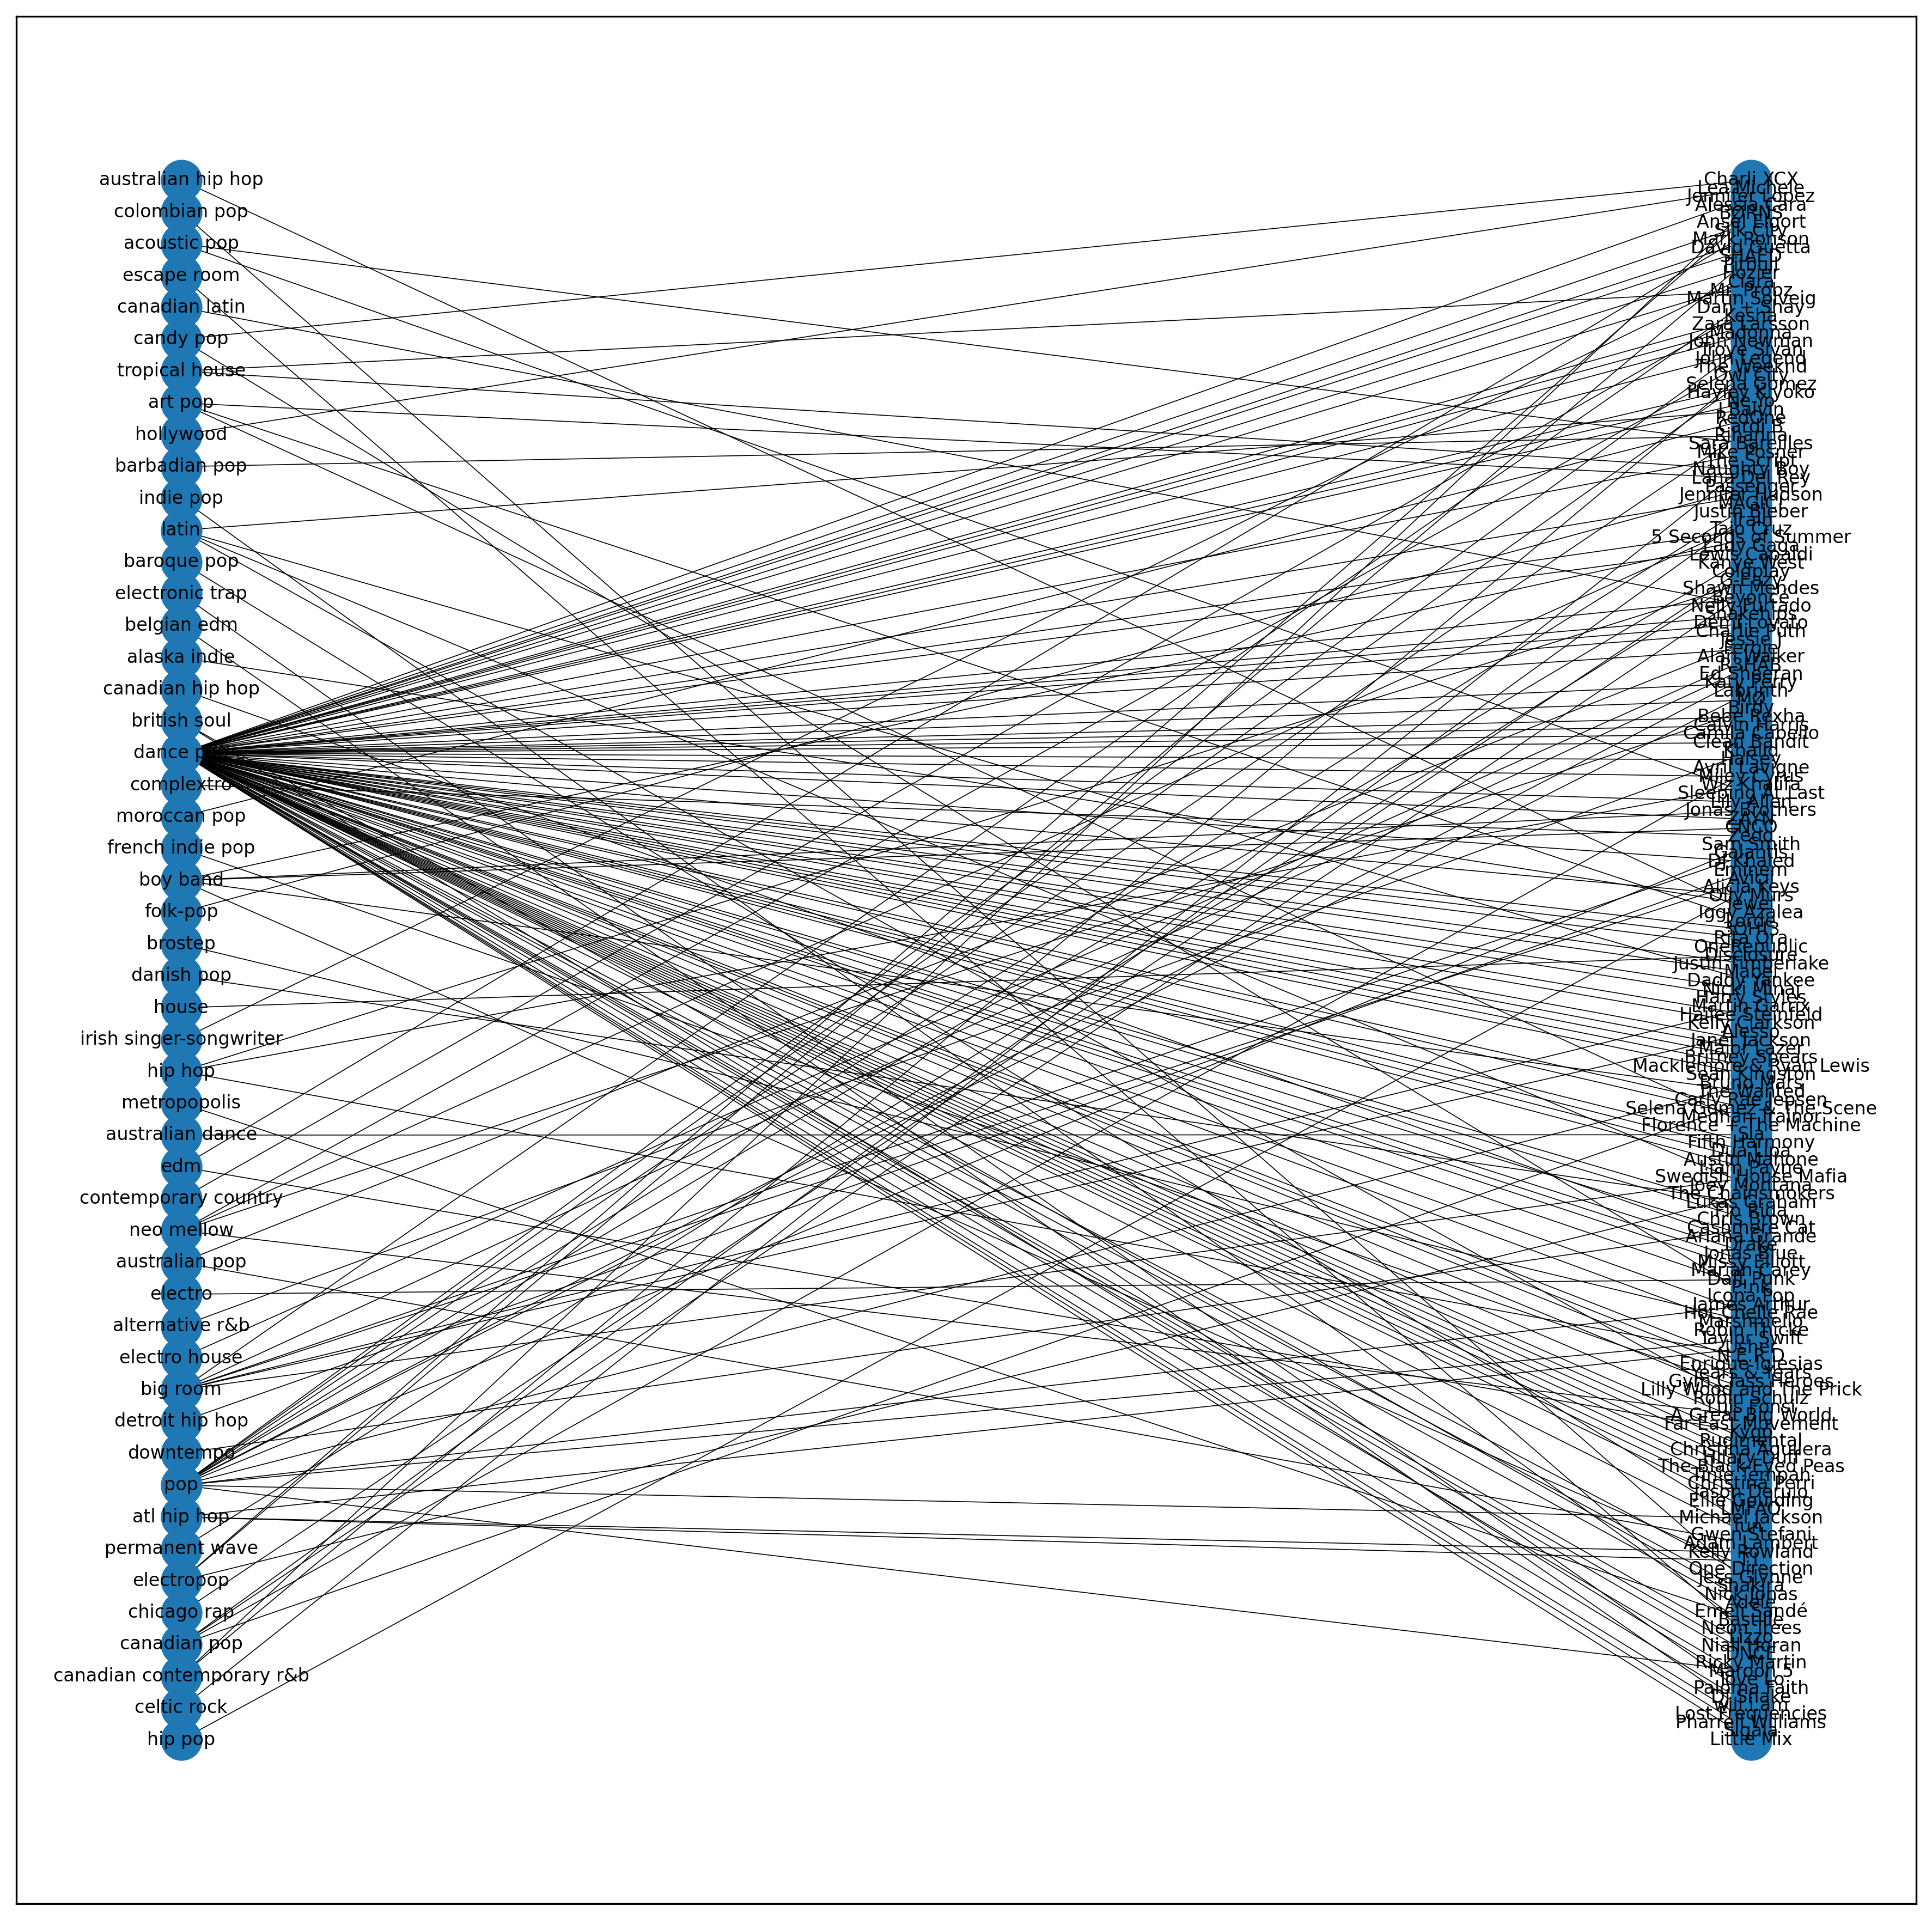

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
pos = nx.spring_layout(g)
fig, ax = plt.subplots(1, 1, figsize = (15, 15), dpi = 300)
nx.draw_networkx(g_1, pos = nx.drawing.layout.bipartite_layout(g_1, genres), font_size = 8, width = 0.4)

In [22]:
g_2 = bipartite.weighted_projected_graph(g_1, genres)
plt.figure(figsize = (15, 15))

layout = nx.spring_layout(g_2)

nx.draw_networkx_nodes(
    g_2,
    layout,
    nodelist = genres,
    node_size = 150,
    node_color = 'green'
)
nx.draw_networkx_edges(g_2, layout, edge_color = '#000000')
node_labels = dict(zip(genres, genres))
nx.draw_networkx_labels(g_2, layout, labels = node_labels)
plt.axis('off')
plt.title('Genres Graph')

plt.show()


NetworkXAlgorithmError: the size of the nodes to project onto (603) is >= the graph size (234).
They are either not a valid bipartite partition or contain duplicates